**NAME: MD NAJMUL HUDA

In [ ]:
#Importing Packages

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [180]:
#Importing Data

sdd_data = pd.read_csv('/content/survey data demographics.csv')
tec_data = pd.read_csv('/content/survey data technologies normalised.csv')


Preprocessing

In [ ]:
sdd_data.head(6)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,Data or business analyst;Database administrato...,17,11,8,Very satisfied,Very satisfie

In [ ]:
sdd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Respondent      11398 non-null  int64  
 1   MainBranch      11398 non-null  object 
 2   Hobbyist        11398 non-null  object 
 3   OpenSourcer     11398 non-null  object 
 4   OpenSource      11317 non-null  object 
 5   Employment      11398 non-null  object 
 6   Country         11398 non-null  object 
 7   Student         11347 non-null  object 
 8   EdLevel         11286 non-null  object 
 9   UndergradMajor  10661 non-null  object 
 10  EduOther        11234 non-null  object 
 11  OrgSize         11302 non-null  object 
 12  DevType         11333 non-null  object 
 13  YearsCode       11389 non-null  object 
 14  Age1stCode      11385 non-null  object 
 15  YearsCodePro    11382 non-null  object 
 16  CareerSat       11398 non-null  object 
 17  JobSat          11397 non-null 

In [ ]:
#Sum of NULL value

sdd_data.isnull().sum()

Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       542
Ethnicity       675
Dependents      140
SurveyLength     19
SurveyEase       14
Length: 70, dtype: int64

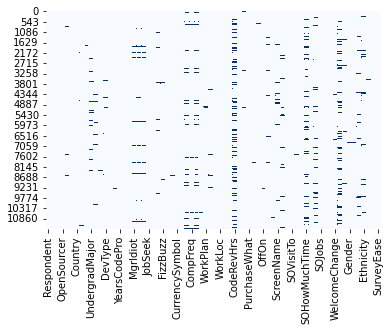

In [ ]:
#Null value Visualization
sns.heatmap(sdd_data.isnull(),cbar=False,cmap='Blues')

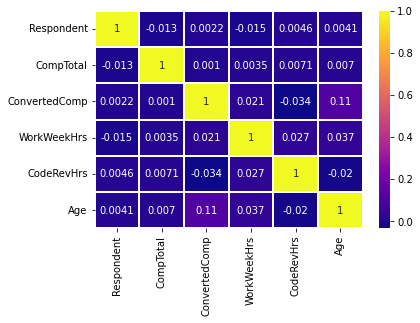

In [ ]:
#correlation visualize matrix
corr = sdd_data.corr()
sns.heatmap(corr, annot = True, cmap='plasma', linecolor= 'white', linewidths=1 )

In [ ]:
figure1 = px.scatter(sdd_data,title = 'Which country people have choosen their profession as Developer',x =None, y='Country',color="Country", symbol="Country" )
figure1.show()

In [196]:
figure2 = go.Figure()
figure2.add_trace(go.Scatter(x=sdd_data.index, y=sdd_data['CareerSat'],line=dict(color='aqua'),name='CareerSat'))
figure2.add_trace(go.Scatter(x=sdd_data.index, y=sdd_data['EdLevel'],line=dict(color='red'),name='Education Level'))
figure2.add_trace(go.Scatter(x=sdd_data.index, y=sdd_data['Country'],line=dict(color='lawngreen'),name='Country'))

figure2.update_layout( title='Country vs Education Level vs Career Satisfaction',
    hovermode="x",
    spikedistance=500, #This line is for showing the distance of spike
    xaxis=dict(
        linecolor="#FFFFFF",
        showspikes=True, # This line is for showing spike line for X-axis
        # Format spike
        spikethickness=4,
        spikedash="dot",
        spikecolor="#000000",
        spikemode="toaxis+across",
    )
)
figure2.show()

In [ ]:
sdd_data.groupby('Country')

In [ ]:
sdd_data.groupby('Country') ['Age','Gender'].head()

,Age,Gender
0,22.0,Man
1,23.0,Man
2,28.0,Man
3,26.0,Man
4,29.0,Man
...,...,...
2334,30.0,Man
2345,23.0,Man
2374,39.0,Man
2450,28.0,Man


Text(0, 0.5, 'Count')

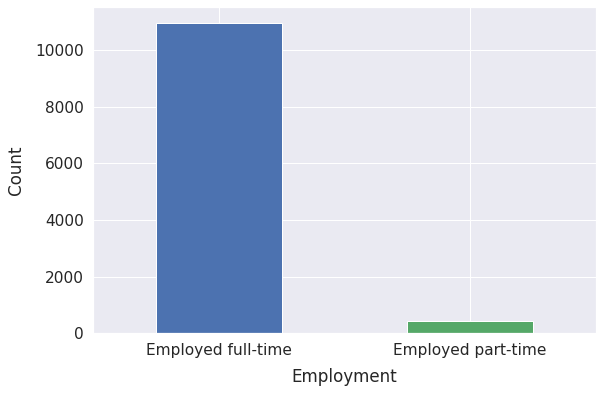

In [199]:
sns.set(font_scale=1.4)
sdd_data['Employment'].value_counts().plot(kind='bar' ,color=['b','g'],figsize=(9, 6), rot=0)
plt.xlabel("Employment", labelpad=10)
plt.ylabel("Count", labelpad=10)

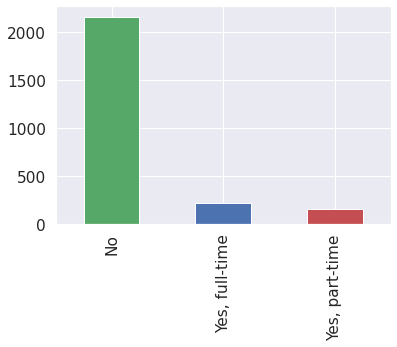

In [169]:
sdd_data['Student'].value_counts().plot(kind='bar',color=['g','b','r'])

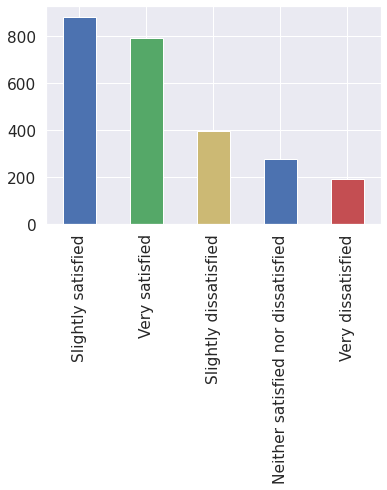

In [171]:
sdd_data['JobSat'].value_counts().plot(kind='bar',color=['b','g','y','b','r'])

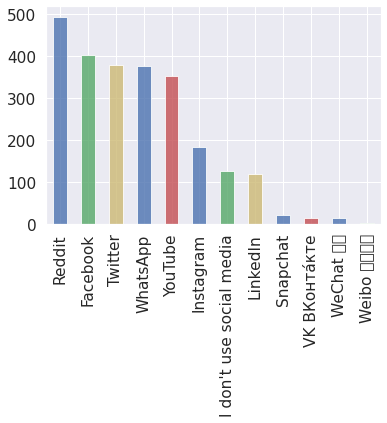

In [174]:
alpha_color = 0.8
sdd_data['SocialMedia'].value_counts().plot(kind='bar',color=['b','g','y','b','r'],alpha=alpha_color)

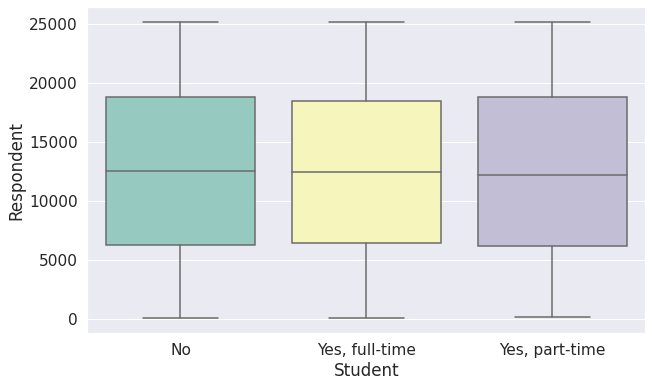

In [200]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Student',y='Respondent',data=sdd_data,palette='Set3')

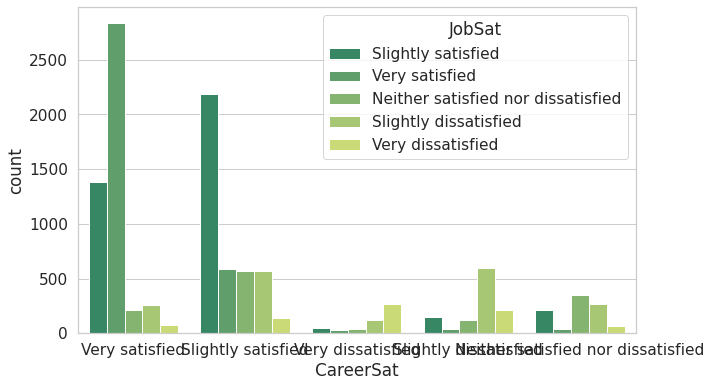

In [209]:
#Job Staisfaction
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x='CareerSat',hue='JobSat',data=sdd_data,palette='summer')

In [ ]:
#Installing spark and Hadoop

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.0-bin-hadoop3.2'

In [ ]:
#Importing Packages

import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import  udf
from pyspark.sql.types import StringType

from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc

from pyspark.sql.functions import asc

from pyspark.sql.functions import sum as Fsum
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
spark = SparkSession.builder\
        .master("local")\
        .appName("Data Cleaning")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
#Importing data In spark
df = spark.read.load("/content/survey data demographics.csv",
                     format="csv",inferSchema=True, header="true")

In [ ]:
df.take(5)

[Row(Respondent=4, MainBranch='I am a developer by profession', Hobbyist='No', OpenSourcer='Never', OpenSource='The quality of OSS and closed source software is about the same', Employment='Employed full-time', Country='United States', Student='No', EdLevel='Bachelor’s degree (BA, BS, B.Eng., etc.)', UndergradMajor='Computer science, computer engineering, or software engineering', EduOther='Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course', OrgSize='100 to 499 employees', DevType='Developer, full-stack', YearsCode='3', Age1stCode='16', YearsCodePro='Less than 1 year', CareerSat='Very satisfied', JobSat='Slightly satisfied', MgrIdiot='Very confident', MgrMoney='No', MgrWant='Not sure', JobSeek='I am not interested in new job opportunities', LastHireDate='Less than a year ago', LastInt='Write code by hand (e.g., on a whiteboard)

In [ ]:
#Show column details
df.printSchema()

root
 |-- Respondent: integer (nullable = true)
 |-- MainBranch: string (nullable = true)
 |-- Hobbyist: string (nullable = true)
 |-- OpenSourcer: string (nullable = true)
 |-- OpenSource: string (nullable = true)
 |-- Employment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Student: string (nullable = true)
 |-- EdLevel: string (nullable = true)
 |-- UndergradMajor: string (nullable = true)
 |-- EduOther: string (nullable = true)
 |-- OrgSize: string (nullable = true)
 |-- DevType: string (nullable = true)
 |-- YearsCode: string (nullable = true)
 |-- Age1stCode: string (nullable = true)
 |-- YearsCodePro: string (nullable = true)
 |-- CareerSat: string (nullable = true)
 |-- JobSat: string (nullable = true)
 |-- MgrIdiot: string (nullable = true)
 |-- MgrMoney: string (nullable = true)
 |-- MgrWant: string (nullable = true)
 |-- JobSeek: string (nullable = true)
 |-- LastHireDate: string (nullable = true)
 |-- LastInt: string (nullable = true)
 |-- FizzBuzz: 

In [ ]:
#Display Rows
df.show(5)

+----------+--------------------+--------+--------------------+--------------------+------------------+--------------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+----------+----------------+------------------+--------------------+------------------+--------+--------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------+--------------------+---------+--------+-------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+----------+--------------------+-----+-----------+--------------------+----------+----------+--------------------+--------------------+--------------------+--------------------+-------------+---------+--------------------+--------------------+----------------

In [ ]:
#Number of rows in Data
df.count()

11398

In [ ]:
#Describing the columns
df.describe().show()

+-------+------------------+--------------------+--------+--------------------+--------------------+------------------+-----------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------+--------------+-----------------+--------+-----------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+----------+--------+-----+----------------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+------

In [ ]:
df.createOrReplaceTempView("Explore")

In [ ]:
spark.sql('Select * from Explore limit 10').show()

+----------+--------------------+--------+--------------------+--------------------+------------------+--------------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+----------+----------------+------------------+--------------------+------------------+--------+--------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------+--------------------+---------+--------+-------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+----------+--------------------+-----+-----------+--------------------+----------+----------+--------------------+--------------------+--------------------+--------------------+-------------+---------+--------------------+--------------------+----------------

In [ ]:
df.describe("UndergradMajor").show()

+-------+--------------------+
|summary|      UndergradMajor|
+-------+--------------------+
|  count|               10661|
|   mean|                null|
| stddev|                null|
|    min|A business discip...|
|    max|Web development o...|
+-------+--------------------+



In [ ]:
df.select("Country").dropDuplicates().sort("country").show()

+--------------------+
|             Country|
+--------------------+
|         Afghanistan|
|             Albania|
|             Algeria|
|           Argentina|
|             Armenia|
|           Australia|
|             Austria|
|          Azerbaijan|
|             Bahrain|
|          Bangladesh|
|             Belarus|
|             Belgium|
|             Bolivia|
|Bosnia and Herzeg...|
|              Brazil|
|   Brunei Darussalam|
|            Bulgaria|
|             Burundi|
|            Cambodia|
|            Cameroon|
+--------------------+
only showing top 20 rows



In [211]:
df.select(['MainBranch', 'Gender','JobSat',]).where(df.CareerSat=='Slightly satisfied').show()

+--------------------+------+--------------------+
|          MainBranch|Gender|              JobSat|
+--------------------+------+--------------------+
|I am a developer ...|   Man|  Slightly satisfied|
|I am a developer ...|   Man|Neither satisfied...|
|I am a developer ...|   Man|   Very dissatisfied|
|I am a developer ...|   Man|  Slightly satisfied|
|I am a developer ...|   Man|  Slightly satisfied|
|I am a developer ...|   Man|      Very satisfied|
|I am a developer ...|   Man|Neither satisfied...|
|I am a developer ...|   Man|      Very satisfied|
|I am not primaril...|   Man|  Slightly satisfied|
|I am a developer ...|   Man|Neither satisfied...|
|I am a developer ...|   Man|Slightly dissatis...|
|I am a developer ...|   Man|      Very satisfied|
|I am a developer ...|   Man|      Very satisfied|
|I am a developer ...|   Man|  Slightly satisfied|
|I am a developer ...|   Man|  Slightly satisfied|
|I am a developer ...|   Man|  Slightly satisfied|
|I am a developer ...|   Man|  

In [ ]:
df.select(['MainBranch', 'Gender','JobSat',]).where(df.CareerSat=='Slightly satisfied').count()

4061

In [ ]:
#Counting Null values
from pyspark.sql import functions as F
df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()

+----------+----------+--------+-----------+----------+----------+-------+-------+-------+--------------+--------+-------+-------+---------+----------+------------+---------+------+--------+--------+-------+-------+------------+-------+--------+----------+------------+--------------+------------+---------+--------+-------------+-----------+--------+-------------+----------+-------+------+-------+----------+---------+-----------+------------+----------+--------+-----+-----------+------------+----------+----------+-----------+---------+------------+-----------+-------------+---------+----------+------+--------+------+-------------+------------+---+------+-----+---------+---------+----------+------------+----------+
|Respondent|MainBranch|Hobbyist|OpenSourcer|OpenSource|Employment|Country|Student|EdLevel|UndergradMajor|EduOther|OrgSize|DevType|YearsCode|Age1stCode|YearsCodePro|CareerSat|JobSat|MgrIdiot|MgrMoney|MgrWant|JobSeek|LastHireDate|LastInt|FizzBuzz|JobFactors|ResumeUpdate|Currency

**Data Set 2**

In [181]:
tec_data.head(5)

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse,NaN,NaN,NaN,NaN
2,4.0,C++,C#,SQLite,SQLite,Windows,Windows,NaN,NaN,Vim,NaN,NaN,NaN,NaN
3,4.0,C#,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio,NaN,NaN,NaN,NaN
4,4.0,Python,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code,NaN,NaN,NaN,NaN


In [182]:
tec_data.describe()

,Respondent,OpSys,Containers,BlockchainOrg,BlockchainIs
count,74589.000000,0.0,0.0,0.0,0.0
mean,12435.258228,NaN,NaN,NaN,NaN
std,7239.729251,NaN,NaN,NaN,NaN
min,4.000000,NaN,NaN,NaN,NaN
25%,6196.000000,NaN,NaN,NaN,NaN
50%,12422.000000,NaN,NaN,NaN,NaN
75%,18756.000000,NaN,NaN,NaN,NaN
max,25142.000000,NaN,NaN,NaN,NaN


In [183]:
tec_data.isnull().sum()

Respondent                    1
LanguageWorkedWith        14798
LanguageDesireNextYear    18826
DatabaseWorkedWith        43215
DatabaseDesireNextYear    45015
PlatformWorkedWith        35382
PlatformDesireNextYear    30276
WebFrameWorkedWith        49787
WebFrameDesireNextYear    50023
DevEnviron                41284
OpSys                     74590
Containers                74590
BlockchainOrg             74590
BlockchainIs              74590
dtype: int64

In [184]:
# fill the missing values for cateorical terms - mode
tec_data['LanguageWorkedWith'] = tec_data["LanguageWorkedWith"].fillna(tec_data['LanguageWorkedWith'].mode()[0])
tec_data['LanguageDesireNextYear'] = tec_data["LanguageDesireNextYear"].fillna(tec_data['LanguageDesireNextYear'].mode()[0])
tec_data['DatabaseDesireNextYear'] = tec_data["DatabaseDesireNextYear"].fillna(tec_data['DatabaseDesireNextYear'].mode()[0])
tec_data['PlatformWorkedWith'] = tec_data["PlatformWorkedWith"].fillna(tec_data['PlatformWorkedWith'].mode()[0])
tec_data['WebFrameWorkedWith'] = tec_data["WebFrameWorkedWith"].fillna(tec_data['WebFrameWorkedWith'].mode()[0])
tec_data['PlatformDesireNextYear'] = tec_data["PlatformDesireNextYear"].fillna(tec_data['PlatformDesireNextYear'].mode()[0])
tec_data['WebFrameDesireNextYear'] = tec_data["WebFrameDesireNextYear"].fillna(tec_data['WebFrameDesireNextYear'].mode()[0])
tec_data['DevEnviron'] = tec_data["DevEnviron"].fillna(tec_data['DevEnviron'].mode()[0])

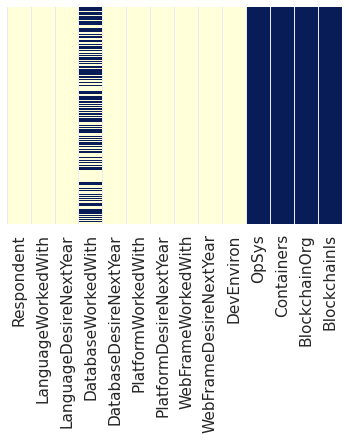

In [187]:
sns.heatmap(tec_data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

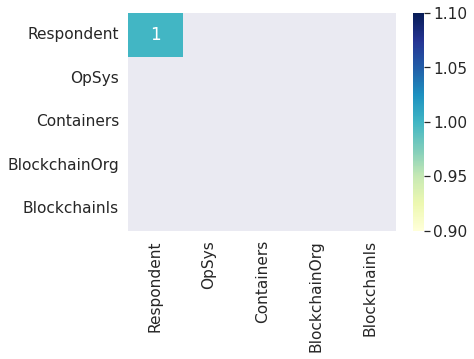

In [189]:
corr = tec_data.corr()
sns.heatmap(corr, annot = True, cmap="YlGnBu")

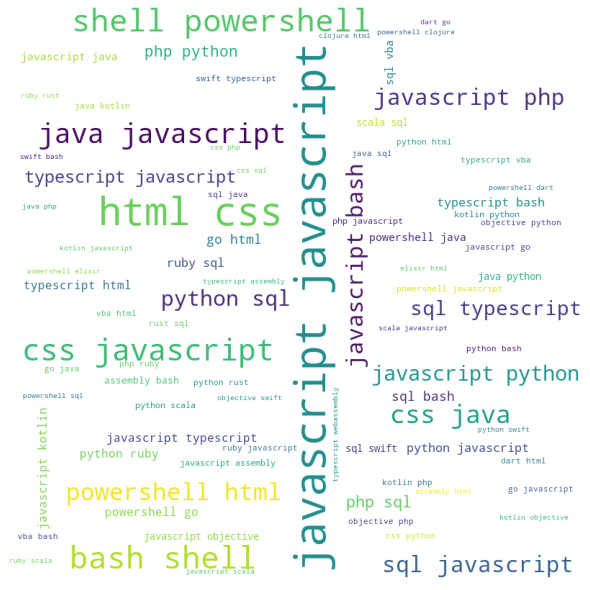

In [190]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in tec_data.LanguageWorkedWith:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()